In [41]:
import pandas as pd
import seaborn as sns
import os
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
data = pd.read_csv(os.getcwd() + "/Real estate.csv")

data.head()

,No,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    414 non-null    int64  
 1   transaction_date      414 non-null    float64
 2   house_age             414 non-null    float64
 3   distance_nearest_MRT  414 non-null    float64
 4   convenience_stores    414 non-null    int64  
 5   latitude              414 non-null    float64
 6   longitude             414 non-null    float64
 7   house_price           414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [44]:
data.isna().head()

,No,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


<Axes: >

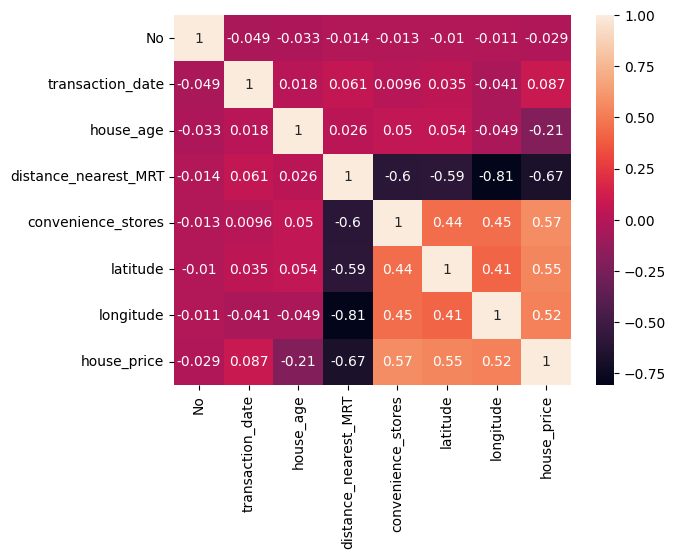

In [45]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [46]:
X = data.drop(["house_price"], axis=1)
Y = data["house_price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

LinearRegression()

In [48]:
train_predict =  linear_regression.predict(X_train)
result_train = metrics.r2_score(Y_train, train_predict)

"score train accuracy: " + str(result_train * 100) + "%"

'score train accuracy: 56.04074935510711%'

In [49]:
test_predict = linear_regression.predict(X_test)
result_test = metrics.r2_score(Y_test, test_predict)

"score test accuracy: " + str(result_test * 100) + "%"

'score test accuracy: 67.45228670350731%'

<Axes: xlabel='house_price'>

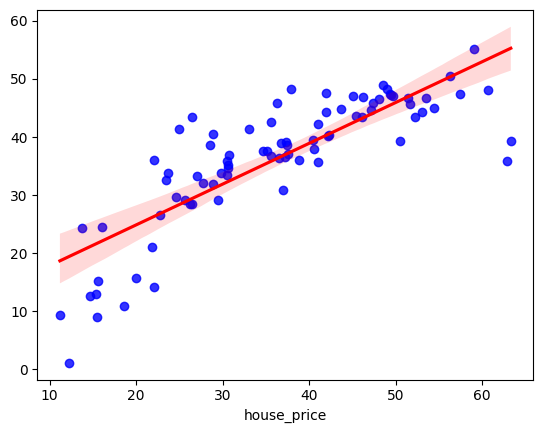

In [51]:
sns.regplot(x=Y_test, y=test_predict, line_kws={"color": "red"}, scatter_kws={"color": "blue"})